
****Immigration to Canada from 1980 to 2013****

<img src="https://media.giphy.com/media/Ru86ce44TU4A8/giphy.gif" width="500px">

<img src="https://i.gifer.com/Yjsl.gif" width="400px">

**Importing some Libraries**

In [1]:
#installing plotly express for advanced visualizations

!pip install plotly_express

In [2]:
# for some basic operatios
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

import folium
import plotly_express as px

# for networks
import networkx as nx

# for providing path
import os
print(os.listdir("../input"))


['Canada.xlsx']


**Reading the Data set**

In [3]:
# there are three sheets in this dataset
# the first sheet is Regions by Citizenship, 

# the second sheet is Canada by Citizenship, and 
# the third sheet is Canada by Citizenship2

# In this Study we will focus on Canada by Citizenship, 
# we have skip first 20 rows as it contains some poster of an organization 

# and also the last row as it contains total.

data = pd.read_excel('../input/Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows = range(20),
                     skipfooter = 2)

# getting the shape of the data
data.shape


(195, 43)

In [4]:

# checking the head of the data

data.sample(15)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
163,Immigrants,Foreigners,State of Palestine,935,Asia,922,Western Asia,902,Developing regions,0,...,376,453,627,441,481,400,654,555,533,462
57,Immigrants,Foreigners,Equatorial Guinea,903,Africa,911,Middle Africa,902,Developing regions,0,...,2,3,4,5,1,5,4,4,4,11
6,Immigrants,Foreigners,Antigua and Barbuda,904,Latin America and the Caribbean,915,Caribbean,902,Developing regions,0,...,14,24,32,15,32,38,27,37,51,25
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
19,Immigrants,Foreigners,Benin,903,Africa,914,Western Africa,902,Developing regions,2,...,112,95,116,183,205,238,290,284,391,397
106,Immigrants,Foreigners,Maldives,935,Asia,5501,Southern Asia,902,Developing regions,0,...,1,0,0,2,1,7,4,3,1,1
27,Immigrants,Foreigners,Burkina Faso,903,Africa,914,Western Africa,902,Developing regions,2,...,97,91,147,136,139,162,186,144,269,322
53,Immigrants,Foreigners,Dominican Republic,904,Latin America and the Caribbean,915,Caribbean,902,Developing regions,40,...,270,303,295,311,438,391,479,739,604,590
85,Immigrants,Foreigners,Italy,908,Europe,925,Southern Europe,901,Developed regions,1820,...,334,344,325,320,370,429,434,374,440,545
140,Immigrants,Foreigners,Republic of Korea,935,Asia,906,Eastern Asia,902,Developing regions,1011,...,5352,5832,6215,5920,7294,5874,5537,4588,5316,4509


In [5]:
# let's check the columns in the data set

data.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

## Data Visualization

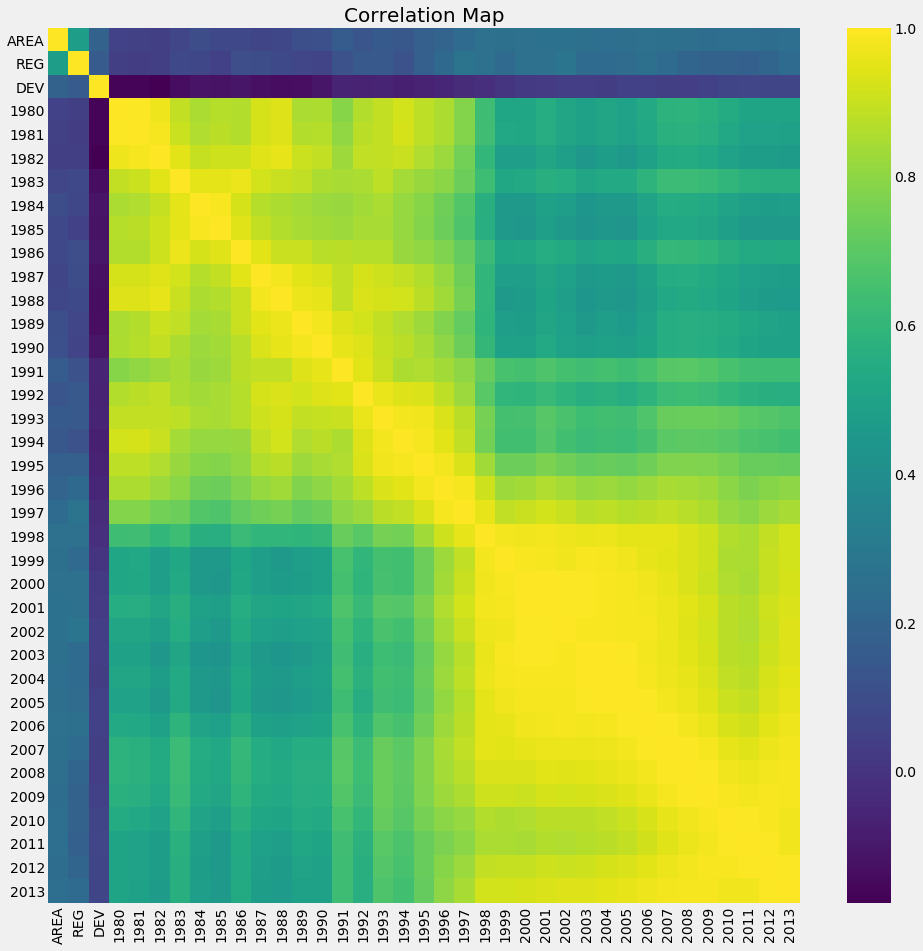

In [6]:
plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fivethirtyeight')

sns.heatmap(data.corr(), cmap = 'viridis')
plt.title('Correlation Map', fontsize = 20)
plt.show()

In [7]:

fig = px.bar_polar(data, r="REG", theta="AreaName",color="RegName", template="plotly_dark",
            color_discrete_sequence= px.colors.sequential.Plasma[-2::-1])
fig.show()


In [8]:

import plotly.io as pio

pio.templates.default = "ggplot2"

d = data[['Coverage','AreaName','DevName',1980]]

fig = px.parallel_categories(d, color=1980, color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

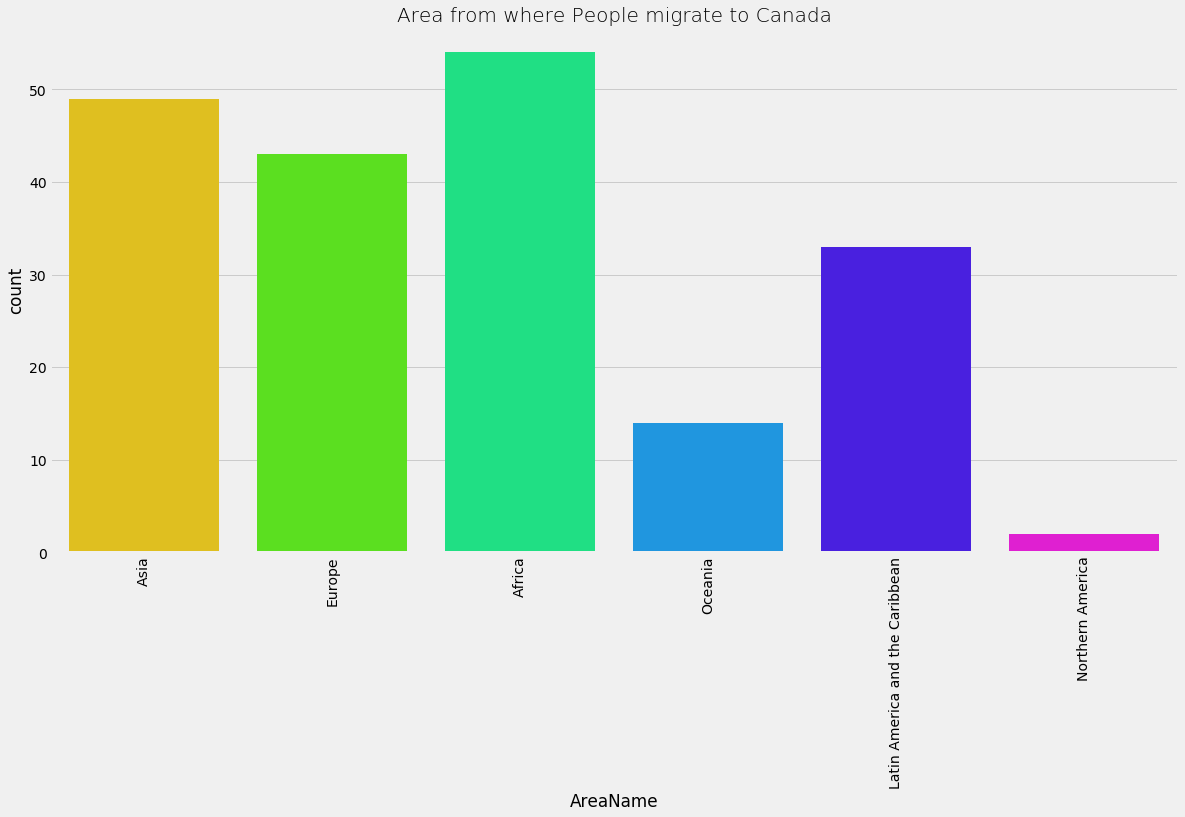

In [9]:
plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('fivethirtyeight')

sns.countplot(data['AreaName'], palette = 'hsv')
plt.title('Area from where People migrate to Canada', fontsize = 20, fontweight = 100)
plt.xticks(rotation = 90)
plt.show()

**Countries from Where People Migrate to Canada**

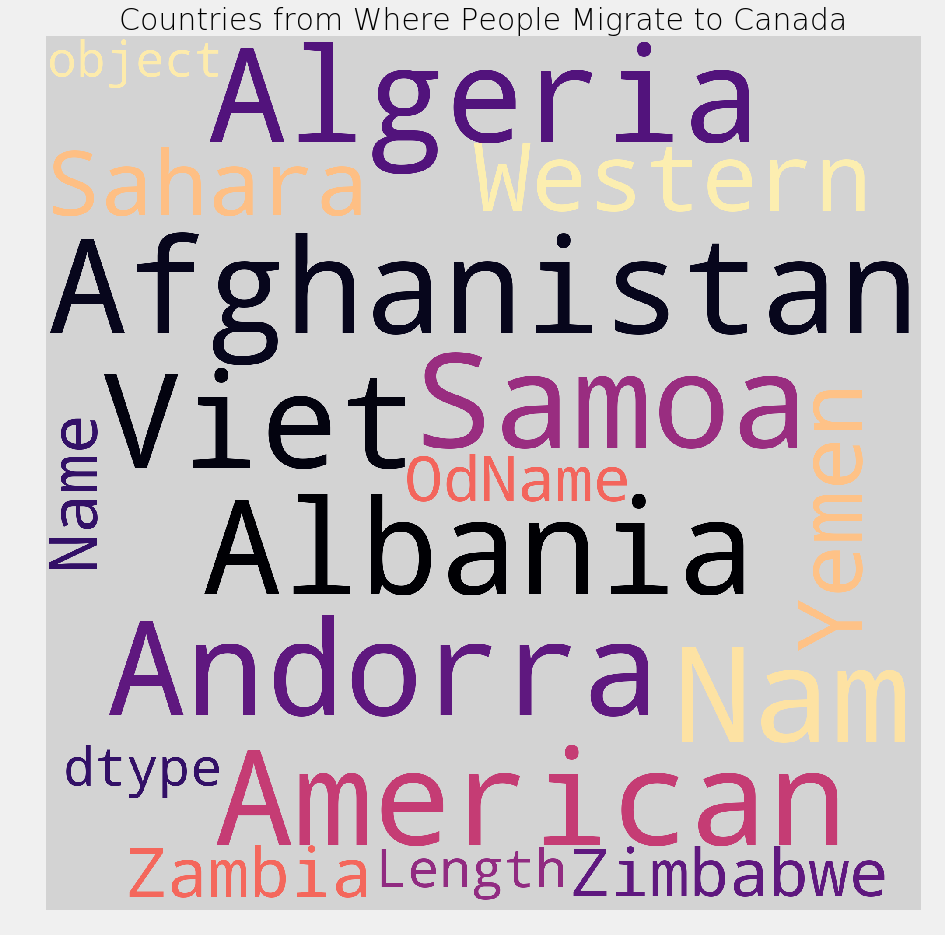

In [10]:
from wordcloud import WordCloud

wc = WordCloud(background_color = 'lightgray',
              width = 2000,
              height = 2000,
              colormap = 'magma',
              max_words = 70).generate(str(data['OdName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Countries from Where People Migrate to Canada', fontsize = 30, fontweight = 10)

plt.imshow(wc)
plt.axis('off')

plt.show()


**Let's Check the Population Over the World in Changing Times**

In [11]:

import plotly.express as px
gapminder = px.data.gapminder()


fig = px.scatter_geo(gapminder, locations="iso_alpha", color="continent", hover_name="country", size="pop",
               animation_frame="year", projection="natural earth")
fig.show()

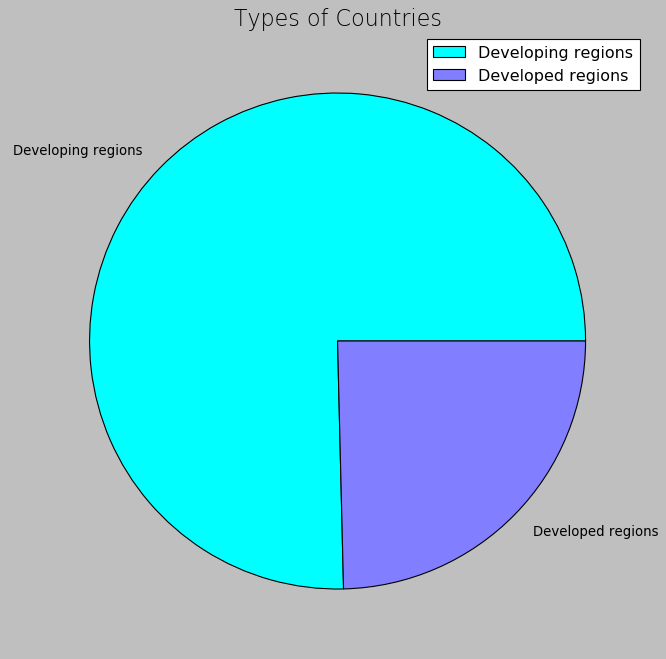

In [12]:

plt.style.use('_classic_test')

colors = plt.cm.cool(np.linspace(0, 50, 100))
data['DevName'].value_counts().plot.pie(colors = colors,
                                       figsize = (10, 10))

plt.title('Types of Countries', fontsize = 20, fontweight = 30)
plt.axis('off')

plt.legend()
plt.show()


**Let's see How the Immigration Changed from 1980 to 2013**

In [13]:
import plotly.io as pio

pio.templates.default = "seaborn"

data.rename(index = int, columns = {1980:"Ninety-Eighty", 2013:"Twenty-Thirteen"}, inplace = True)
fig = px.scatter(data, x='Ninety-Eighty', y='Twenty-Thirteen', facet_col="DevName",
                 width=800, height=700)

fig.update_layout(
    margin=dict(l=100, r=100, t=100, b=100),
    paper_bgcolor="LightBlue",
)

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()


## Data Cleaning

In [14]:
# data cleaning

# let's remove the columns which are not required
data = data.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1)

# adding a Total column to add more information
data['Total'] = data.sum(axis = 1)

# let's check the head of the cleaned data
data.head()

,OdName,AreaName,RegName,DevName,Ninety-Eighty,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,Twenty-Thirteen,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [15]:
# download countries geojson file

!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

wget: /opt/conda/lib/libuuid.so.1: no version information available (required by wget)
GeoJSON file downloaded!


In [16]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')


## Immigration to Canada

In [17]:

import warnings
warnings.filterwarnings('ignore')

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=data,
    columns=['OdName', 'Total'],
    key_on='feature.properties.name',
    fill_color='Greens', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map
